BOT-IOT DATASET (Rajan, Rippendeep, Sanyamdeep, Ritika, Shreya)           
Description:                              
https://ieee-dataport.org/documents/bot-iot-dataset       
Dataset:                                
https://cloudstor.aarnet.edu.au/plus/s/umT99TnxvbpkkoE?path=%2FCSV%2FTraning%20and%20Testing%20Tets%20(5%25%20of%20the%20entier%20dataset)%2F10-best%20features%2F10-best%20Training-Testing%20split

In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
link = 'https://drive.google.com/file/d/1uV8qsVnl1XLxLlfw2tnGF3rbIU3tntHI/view?usp=sharing'
linkId = '1uV8qsVnl1XLxLlfw2tnGF3rbIU3tntHI'

In [ ]:
#fluff
print (linkId)

1uV8qsVnl1XLxLlfw2tnGF3rbIU3tntHI


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
downloaded = drive.CreateFile({'id':linkId}) 
downloaded.GetContentFile('Bot_IOT.csv')  
df = pd.read_csv('Bot_IOT.csv')

In [ ]:
print(df)

         pkSeqID proto            saddr  ... attack category subcategory
0        3142762   udp  192.168.100.150  ...      1     DDoS         UDP
1        2432264   tcp  192.168.100.150  ...      1     DDoS         TCP
2        1976315   tcp  192.168.100.147  ...      1     DDoS         TCP
3        1240757   udp  192.168.100.150  ...      1      DoS         UDP
4        3257991   udp  192.168.100.147  ...      1     DDoS         UDP
...          ...   ...              ...  ...    ...      ...         ...
2934812  1132803   udp  192.168.100.149  ...      1      DoS         UDP
2934813  3384621   udp  192.168.100.150  ...      1     DDoS         UDP
2934814   775893   udp  192.168.100.149  ...      1      DoS         UDP
2934815   443484   tcp  192.168.100.147  ...      1      DoS         TCP
2934816    96906   tcp  192.168.100.150  ...      1      DoS         TCP

[2934817 rows x 19 columns]


In [ ]:
#Data preprocessing
#checking for NULL Values
null_columns = df.columns[df.isnull().any()]
df[null_columns].isnull().sum()

Series([], dtype: float64)

In [ ]:
df.head()

,pkSeqID,proto,saddr,sport,daddr,dport,seq,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max,attack,category,subcategory
0,3142762,udp,192.168.100.150,6551,192.168.100.3,80,251984,1.900363,100,0.000000,4,2.687519,100,0.0,0.494549,4.031619,1,DDoS,UDP
1,2432264,tcp,192.168.100.150,5532,192.168.100.3,80,256724,0.078003,38,3.856930,3,3.934927,100,0.0,0.256493,4.012924,1,DDoS,TCP
2,1976315,tcp,192.168.100.147,27165,192.168.100.3,80,62921,0.268666,100,2.974100,3,3.341429,100,0.0,0.294880,3.609205,1,DDoS,TCP
3,1240757,udp,192.168.100.150,48719,192.168.100.3,80,99168,1.823185,63,0.000000,4,3.222832,63,0.0,0.461435,4.942302,1,DoS,UDP
4,3257991,udp,192.168.100.147,22461,192.168.100.3,80,105063,0.822418,100,2.979995,4,3.983222,100,0.0,1.002999,4.994452,1,DDoS,UDP


In [ ]:
uniqueValues = df.nunique()
print('Count of unique values in each column :')
print(uniqueValues)

Count of unique values in each column :
pkSeqID              2934817
proto                      5
saddr                     20
sport                  65541
daddr                     81
dport                   6906
seq                   262206
stddev                401054
N_IN_Conn_P_SrcIP        100
min                   256015
state_number              11
mean                  479462
N_IN_Conn_P_DstIP        100
drate                  18952
srate                 114098
max                   558914
attack                     2
category                   5
subcategory                8
dtype: int64


In [ ]:
dataTypeSeries = df.dtypes
print('Data type of each column of Dataframe:')
print(dataTypeSeries)

Data type of each column of Dataframe:
pkSeqID                int64
proto                 object
saddr                 object
sport                 object
daddr                 object
dport                 object
seq                    int64
stddev               float64
N_IN_Conn_P_SrcIP      int64
min                  float64
state_number           int64
mean                 float64
N_IN_Conn_P_DstIP      int64
drate                float64
srate                float64
max                  float64
attack                 int64
category              object
subcategory           object
dtype: object


In [ ]:
df.corr()

,pkSeqID,seq,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max,attack
pkSeqID,1.000000,-0.027136,0.162617,-0.034084,0.285961,0.202782,0.398544,0.344883,0.012629,0.005549,0.349825,-0.018480
seq,-0.027136,1.000000,0.071785,0.066903,0.016441,0.051894,0.059093,0.052820,-0.011199,-0.004691,0.072290,0.016659
stddev,0.162617,0.071785,1.000000,0.041382,-0.375931,0.339865,0.350581,0.040469,-0.008364,-0.003818,0.668193,0.011872
N_IN_Conn_P_SrcIP,-0.034084,0.066903,0.041382,1.000000,0.028413,0.036031,0.061703,0.575716,-0.008289,-0.005509,0.065151,0.028637
min,0.285961,0.016441,-0.375931,0.028413,1.000000,0.275102,0.694039,0.103538,-0.005078,-0.002126,0.427138,0.005226
state_number,0.202782,0.051894,0.339865,0.036031,0.275102,1.000000,0.571467,-0.047885,-0.003675,-0.004353,0.565148,0.002701
mean,0.398544,0.059093,0.350581,0.061703,0.694039,0.571467,1.000000,0.120107,-0.011026,-0.004828,0.908659,0.012848
N_IN_Conn_P_DstIP,0.344883,0.052820,0.040469,0.575716,0.103538,-0.047885,0.120107,1.000000,-0.003527,-0.004412,0.101192,0.052049
drate,0.012629,-0.011199,-0.008364,-0.008289,-0.005078,-0.003675,-0.011026,-0.003527,1.000000,0.036855,-0.012199,-0.002730
srate,0.005549,-0.004691,-0.003818,-0.005509,-0.002126,-0.004353,-0.004828,-0.004412,0.036855,1.000000,-0.005418,-0.096710


In [ ]:
df=df.drop(['pkSeqID', 'saddr', 'sport', 'daddr', 'dport', 'proto'], axis = 1)

In [ ]:
df.corr()

,seq,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max,attack
seq,1.000000,0.071785,0.066903,0.016441,0.051894,0.059093,0.052820,-0.011199,-0.004691,0.072290,0.016659
stddev,0.071785,1.000000,0.041382,-0.375931,0.339865,0.350581,0.040469,-0.008364,-0.003818,0.668193,0.011872
N_IN_Conn_P_SrcIP,0.066903,0.041382,1.000000,0.028413,0.036031,0.061703,0.575716,-0.008289,-0.005509,0.065151,0.028637
min,0.016441,-0.375931,0.028413,1.000000,0.275102,0.694039,0.103538,-0.005078,-0.002126,0.427138,0.005226
state_number,0.051894,0.339865,0.036031,0.275102,1.000000,0.571467,-0.047885,-0.003675,-0.004353,0.565148,0.002701
mean,0.059093,0.350581,0.061703,0.694039,0.571467,1.000000,0.120107,-0.011026,-0.004828,0.908659,0.012848
N_IN_Conn_P_DstIP,0.052820,0.040469,0.575716,0.103538,-0.047885,0.120107,1.000000,-0.003527,-0.004412,0.101192,0.052049
drate,-0.011199,-0.008364,-0.008289,-0.005078,-0.003675,-0.011026,-0.003527,1.000000,0.036855,-0.012199,-0.002730
srate,-0.004691,-0.003818,-0.005509,-0.002126,-0.004353,-0.004828,-0.004412,0.036855,1.000000,-0.005418,-0.096710
max,0.072290,0.668193,0.065151,0.427138,0.565148,0.908659,0.101192,-0.012199,-0.005418,1.000000,0.015015


In [ ]:
dataTypeSeries2 = df.dtypes
print('Data type of each column of new Dataframe:')
print(dataTypeSeries2)

Data type of each column of new Dataframe:
seq                    int64
stddev               float64
N_IN_Conn_P_SrcIP      int64
min                  float64
state_number           int64
mean                 float64
N_IN_Conn_P_DstIP      int64
drate                float64
srate                float64
max                  float64
attack                 int64
category              object
subcategory           object
dtype: object


In [ ]:
df['attack'].unique()

array([1, 0])

In [ ]:
uniqueValues2 = df.nunique()
print('Count of unique values in each column :')
print(uniqueValues2)

Count of unique values in each column :
seq                  262206
stddev               401054
N_IN_Conn_P_SrcIP       100
min                  256015
state_number             11
mean                 479462
N_IN_Conn_P_DstIP       100
drate                 18952
srate                114098
max                  558914
attack                    2
category                  5
subcategory               8
dtype: int64


In [ ]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score

In [ ]:
#dependent and independent variables
X = df.iloc[:, 0:10]
Y = df.loc[:, 'attack']


In [ ]:
X

,seq,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max
0,251984,1.900363,100,0.000000,4,2.687519,100,0.000000,0.494549,4.031619
1,256724,0.078003,38,3.856930,3,3.934927,100,0.000000,0.256493,4.012924
2,62921,0.268666,100,2.974100,3,3.341429,100,0.000000,0.294880,3.609205
3,99168,1.823185,63,0.000000,4,3.222832,63,0.000000,0.461435,4.942302
4,105063,0.822418,100,2.979995,4,3.983222,100,0.000000,1.002999,4.994452
...,...,...,...,...,...,...,...,...,...,...
2934812,253370,0.016992,100,4.082509,4,4.102515,100,0.000000,0.243473,4.124047
2934813,231693,1.922317,100,0.000000,4,2.718527,100,0.000000,0.490800,4.090534
2934814,158616,2.112228,100,0.000000,4,2.110766,100,0.000000,0.207444,4.332615
2934815,179855,0.000000,100,0.000000,3,0.000000,100,0.000000,0.162130,0.000000


In [ ]:
Y

0          1
1          1
2          1
3          1
4          1
          ..
2934812    1
2934813    1
2934814    1
2934815    1
2934816    1
Name: attack, Length: 2934817, dtype: int64

In [ ]:
df['attack'].value_counts()

1    2934447
0        370
Name: attack, dtype: int64

In [ ]:
#training and testing data
X_train, X_val, Y_train, Y_val = train_test_split(X,Y, test_size = 0.3)

In [ ]:
# from imblearn.over_sampling import SMOTE                        Balance imbalance data
# sm = SMOTE(random_state=2)
# X_train, Y_train = sm.fit_sample(X_train, Y_train.ravel())
# print(sum(Y_train==0))
# print(sum(Y_train==1))


2054121
2054121


In [ ]:
X_train.shape

(4108242, 10)

In [ ]:
scores_id3_entropy = []
print('Accuracy score for values of max_depth of a decision tree are :')
print('Max Depth      Accuracy Score')
for i in range(1,9):
  dtree_test_entropy = DecisionTreeClassifier(criterion='entropy',max_depth=i)
  dtree_test_entropy.fit(X_train,Y_train)
  scores_id3_entropy.append(dtree_test_entropy.score(X_val,Y_val))
  print(i,'          ', scores_id3_entropy[i-1])

print('We got maximum accuracy for max_depth=', scores_id3_entropy.index(max(scores_id3_entropy))+1, 'and the maximum accuracy is: ', max(scores_id3_entropy))

Accuracy score for values of max_depth of a decision tree are :
Max Depth      Accuracy Score
1            0.9998443970442253
2            0.9998443970442253
3            0.9998443970442253
4            0.999897779080148
5            0.9999045938081381
6            0.9999102727481299
7            0.9999500253280723
8            0.9999670621480476
We got maximum accuracy for max_depth= 8 and the maximum accuracy is:  0.9999670621480476


In [ ]:
#making classifier
clf = DecisionTreeClassifier(criterion='entropy' , max_depth=8)

In [ ]:
#Training the classifier
clf.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
#calcuating accuracy of the model on validation set
Predt = clf.predict(X_val)

#calculate accuracy
print (accuracy_score(Y_val, Predt)*100 )

99.95945236845871


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
#confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(Y_val, Predt))

Confusion Matrix:
[[   116      4]
 [   353 879973]]


[Text(257.6390625, 205.35999999999999, 'X[6] <= 24.5\nentropy = 0.002\nsamples = 2054371\nvalue = [233, 2054138]'),
 Text(201.40312500000002, 181.2, 'X[0] <= 33730.0\nentropy = 0.063\nsamples = 31634\nvalue = [232, 31402]'),
 Text(193.033125, 157.04, 'X[6] <= 4.5\nentropy = 0.171\nsamples = 9132\nvalue = [232, 8900]'),
 Text(105.67125000000001, 132.88, 'X[3] <= 0.0\nentropy = 0.891\nsamples = 396\nvalue = [122, 274]'),
 Text(50.220000000000006, 108.72, 'X[4] <= 6.5\nentropy = 0.383\nsamples = 241\nvalue = [18, 223]'),
 Text(41.85000000000001, 84.56, 'X[9] <= 0.0\nentropy = 0.291\nsamples = 235\nvalue = [12, 223]'),
 Text(25.110000000000003, 60.400000000000006, 'X[4] <= 4.5\nentropy = 0.461\nsamples = 113\nvalue = [11, 102]'),
 Text(16.740000000000002, 36.24000000000001, 'X[4] <= 3.5\nentropy = 0.898\nsamples = 35\nvalue = [11, 24]'),
 Text(8.370000000000001, 12.079999999999984, 'entropy = 0.0\nsamples = 23\nvalue = [0, 23]'),
 Text(25.110000000000003, 12.079999999999984, 'entropy = 0.4

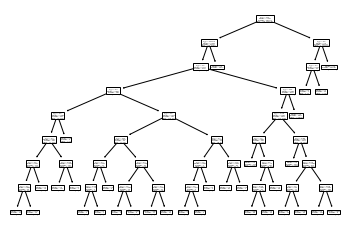

In [ ]:
#visualize the tree
tree.plot_tree(clf)

In [ ]:
####Uploading testing DATA
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:

link = 'https://drive.google.com/file/d/1QIJWtK99SblVQK88AHqHwAVBZJcT14yW/view?usp=sharing'
linkId = '1QIJWtK99SblVQK88AHqHwAVBZJcT14yW'

In [ ]:
downloaded = drive.CreateFile({'id':linkId}) 
downloaded.GetContentFile('Bot_IOT_Test.csv')  
dfTEST = pd.read_csv('Bot_IOT_Test.csv')
dfTEST

,pkSeqID,proto,saddr,sport,daddr,dport,seq,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max,attack,category,subcategory
0,792371,udp,192.168.100.150,48516,192.168.100.3,80,175094,0.226784,100,4.100436,4,4.457383,100,0.000000,0.404711,4.719438,1,DoS,UDP
1,2056418,tcp,192.168.100.148,22267,192.168.100.3,80,143024,0.451998,100,3.439257,1,3.806172,100,0.225077,0.401397,4.442930,1,DDoS,TCP
2,2795650,udp,192.168.100.149,28629,192.168.100.3,80,167033,1.931553,73,0.000000,4,2.731204,100,0.000000,0.407287,4.138455,1,DDoS,UDP
3,2118009,tcp,192.168.100.148,42142,192.168.100.3,80,204615,0.428798,56,3.271411,1,3.626428,100,0.000000,0.343654,4.229700,1,DDoS,TCP
4,303688,tcp,192.168.100.149,1645,192.168.100.5,80,40058,2.058381,100,0.000000,3,1.188407,100,0.000000,0.135842,4.753628,1,DoS,TCP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
733700,1571905,udp,192.168.100.148,17412,192.168.100.6,80,168162,1.743940,39,0.000000,4,3.020449,39,0.000000,0.224603,4.043432,1,DoS,UDP
733701,2787099,udp,192.168.100.147,932,192.168.100.3,80,158482,0.694618,65,3.002272,4,3.905409,100,0.000000,0.875121,4.691634,1,DDoS,UDP
733702,2255382,tcp,192.168.100.149,47980,192.168.100.3,80,79841,1.744651,53,0.000000,1,2.464288,100,0.278496,0.472773,3.802142,1,DDoS,TCP
733703,588946,tcp,192.168.100.147,25096,192.168.100.7,80,63165,0.000000,100,0.000000,3,0.000000,100,0.000000,0.070461,0.000000,1,DoS,TCP


In [ ]:
dfTEST=dfTEST.drop(['pkSeqID', 'saddr', 'sport', 'daddr', 'dport', 'proto'], axis = 1)


In [ ]:
X_Test = dfTEST.iloc[: , 0:10]
Y_Test = dfTEST.loc[:,'attack']

In [ ]:
X_Test

,seq,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max
0,175094,0.226784,100,4.100436,4,4.457383,100,0.000000,0.404711,4.719438
1,143024,0.451998,100,3.439257,1,3.806172,100,0.225077,0.401397,4.442930
2,167033,1.931553,73,0.000000,4,2.731204,100,0.000000,0.407287,4.138455
3,204615,0.428798,56,3.271411,1,3.626428,100,0.000000,0.343654,4.229700
4,40058,2.058381,100,0.000000,3,1.188407,100,0.000000,0.135842,4.753628
...,...,...,...,...,...,...,...,...,...,...
733700,168162,1.743940,39,0.000000,4,3.020449,39,0.000000,0.224603,4.043432
733701,158482,0.694618,65,3.002272,4,3.905409,100,0.000000,0.875121,4.691634
733702,79841,1.744651,53,0.000000,1,2.464288,100,0.278496,0.472773,3.802142
733703,63165,0.000000,100,0.000000,3,0.000000,100,0.000000,0.070461,0.000000


In [ ]:
#calcuating accuracy of the model on validation set
Predt1 = clf.predict(X_Test)

#calculate accuracy
print (accuracy_score(Y_Test, Predt1)*100 )

99.9642908253317


----------------------------------attack predicted using entropy.


In [ ]:
#confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(Y_Test, Predt1))

Confusion Matrix:
[[   106      1]
 [   261 733337]]


In [ ]:
df

,seq,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max,attack,category,subcategory
0,251984,1.900363,100,0.000000,4,2.687519,100,0.000000,0.494549,4.031619,1,DDoS,UDP
1,256724,0.078003,38,3.856930,3,3.934927,100,0.000000,0.256493,4.012924,1,DDoS,TCP
2,62921,0.268666,100,2.974100,3,3.341429,100,0.000000,0.294880,3.609205,1,DDoS,TCP
3,99168,1.823185,63,0.000000,4,3.222832,63,0.000000,0.461435,4.942302,1,DoS,UDP
4,105063,0.822418,100,2.979995,4,3.983222,100,0.000000,1.002999,4.994452,1,DDoS,UDP
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2934812,253370,0.016992,100,4.082509,4,4.102515,100,0.000000,0.243473,4.124047,1,DoS,UDP
2934813,231693,1.922317,100,0.000000,4,2.718527,100,0.000000,0.490800,4.090534,1,DDoS,UDP
2934814,158616,2.112228,100,0.000000,4,2.110766,100,0.000000,0.207444,4.332615,1,DoS,UDP
2934815,179855,0.000000,100,0.000000,3,0.000000,100,0.000000,0.162130,0.000000,1,DoS,TCP


In [ ]:
from array import array
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le1 = LabelEncoder()
df['category']=le.fit_transform(df['category'])
df['subcategory']=le1.fit_transform(df['subcategory'])

dfTEST['category']=le.transform(dfTEST['category'])
dfTEST['subcategory']=le1.transform(dfTEST['subcategory'])


In [ ]:
df

,seq,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max,attack,category,subcategory
0,251984,1.900363,100,0.000000,4,2.687519,100,0.000000,0.494549,4.031619,1,0,7
1,256724,0.078003,38,3.856930,3,3.934927,100,0.000000,0.256493,4.012924,1,0,6
2,62921,0.268666,100,2.974100,3,3.341429,100,0.000000,0.294880,3.609205,1,0,6
3,99168,1.823185,63,0.000000,4,3.222832,63,0.000000,0.461435,4.942302,1,1,7
4,105063,0.822418,100,2.979995,4,3.983222,100,0.000000,1.002999,4.994452,1,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2934812,253370,0.016992,100,4.082509,4,4.102515,100,0.000000,0.243473,4.124047,1,1,7
2934813,231693,1.922317,100,0.000000,4,2.718527,100,0.000000,0.490800,4.090534,1,0,7
2934814,158616,2.112228,100,0.000000,4,2.110766,100,0.000000,0.207444,4.332615,1,1,7
2934815,179855,0.000000,100,0.000000,3,0.000000,100,0.000000,0.162130,0.000000,1,1,6


In [ ]:
dfTEST

,seq,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max,attack,category,subcategory
0,175094,0.226784,100,4.100436,4,4.457383,100,0.000000,0.404711,4.719438,1,1,7
1,143024,0.451998,100,3.439257,1,3.806172,100,0.225077,0.401397,4.442930,1,0,6
2,167033,1.931553,73,0.000000,4,2.731204,100,0.000000,0.407287,4.138455,1,0,7
3,204615,0.428798,56,3.271411,1,3.626428,100,0.000000,0.343654,4.229700,1,0,6
4,40058,2.058381,100,0.000000,3,1.188407,100,0.000000,0.135842,4.753628,1,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
733700,168162,1.743940,39,0.000000,4,3.020449,39,0.000000,0.224603,4.043432,1,1,7
733701,158482,0.694618,65,3.002272,4,3.905409,100,0.000000,0.875121,4.691634,1,0,7
733702,79841,1.744651,53,0.000000,1,2.464288,100,0.278496,0.472773,3.802142,1,0,6
733703,63165,0.000000,100,0.000000,3,0.000000,100,0.000000,0.070461,0.000000,1,1,6


In [ ]:
#dependent and independent variables
X_cat_train = df.iloc[:, 0:11]
Y_cat_train = df.loc[:, 'category']

X_cat_test =dfTEST.iloc[:, 0:10]
X_cat_test['attack']=Predt1
Y_cat_test=dfTEST.loc[:, 'category']

In [ ]:
X_cat_train

,seq,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max,attack
0,251984,1.900363,100,0.000000,4,2.687519,100,0.000000,0.494549,4.031619,1
1,256724,0.078003,38,3.856930,3,3.934927,100,0.000000,0.256493,4.012924,1
2,62921,0.268666,100,2.974100,3,3.341429,100,0.000000,0.294880,3.609205,1
3,99168,1.823185,63,0.000000,4,3.222832,63,0.000000,0.461435,4.942302,1
4,105063,0.822418,100,2.979995,4,3.983222,100,0.000000,1.002999,4.994452,1
...,...,...,...,...,...,...,...,...,...,...,...
2934812,253370,0.016992,100,4.082509,4,4.102515,100,0.000000,0.243473,4.124047,1
2934813,231693,1.922317,100,0.000000,4,2.718527,100,0.000000,0.490800,4.090534,1
2934814,158616,2.112228,100,0.000000,4,2.110766,100,0.000000,0.207444,4.332615,1
2934815,179855,0.000000,100,0.000000,3,0.000000,100,0.000000,0.162130,0.000000,1


In [ ]:
X_cat_test

,seq,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max,attack
0,175094,0.226784,100,4.100436,4,4.457383,100,0.000000,0.404711,4.719438,1
1,143024,0.451998,100,3.439257,1,3.806172,100,0.225077,0.401397,4.442930,1
2,167033,1.931553,73,0.000000,4,2.731204,100,0.000000,0.407287,4.138455,1
3,204615,0.428798,56,3.271411,1,3.626428,100,0.000000,0.343654,4.229700,1
4,40058,2.058381,100,0.000000,3,1.188407,100,0.000000,0.135842,4.753628,1
...,...,...,...,...,...,...,...,...,...,...,...
733700,168162,1.743940,39,0.000000,4,3.020449,39,0.000000,0.224603,4.043432,1
733701,158482,0.694618,65,3.002272,4,3.905409,100,0.000000,0.875121,4.691634,1
733702,79841,1.744651,53,0.000000,1,2.464288,100,0.278496,0.472773,3.802142,1
733703,63165,0.000000,100,0.000000,3,0.000000,100,0.000000,0.070461,0.000000,1


In [ ]:
#making classifier
clf1 = DecisionTreeClassifier(criterion='entropy' , max_depth=8)
#Training the classifier
clf1.fit(X_cat_train, Y_cat_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

[Text(143.98886138613864, 205.35999999999999, 'X[6] <= 99.5\nentropy = 1.141\nsamples = 2934817\nvalue = [1541315, 1320148, 370, 72919, 65]'),
 Text(62.25705445544555, 181.2, 'X[8] <= 0.034\nentropy = 0.326\nsamples = 638261\nvalue = [6090, 606426, 370, 25310, 65]'),
 Text(24.239851485148517, 157.04, 'X[10] <= 0.5\nentropy = 0.18\nsamples = 24966\nvalue = [195, 21, 267, 24439, 44]'),
 Text(22.58242574257426, 132.88, 'entropy = 0.0\nsamples = 267\nvalue = [0, 0, 267, 0, 0]'),
 Text(25.897277227722775, 132.88, 'X[0] <= 46769.0\nentropy = 0.095\nsamples = 24699\nvalue = [195, 21, 0, 24439, 44]'),
 Text(16.98861386138614, 108.72, 'X[0] <= 88.5\nentropy = 0.024\nsamples = 24492\nvalue = [0, 9, 0, 24439, 44]'),
 Text(10.773267326732674, 84.56, 'X[2] <= 45.5\nentropy = 0.91\nsamples = 183\nvalue = [0, 3, 0, 136, 44]'),
 Text(6.62970297029703, 60.400000000000006, 'X[6] <= 4.0\nentropy = 0.371\nsamples = 140\nvalue = [0, 3, 0, 132, 5]'),
 Text(3.314851485148515, 36.24000000000001, 'X[3] <= 0.0\

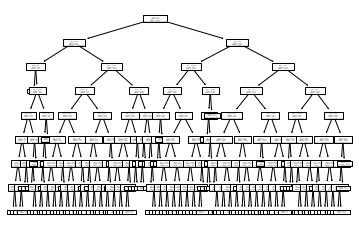

In [ ]:
#visualize the tree
tree.plot_tree(clf1)

In [ ]:
#calcuating accuracy of the model on validation set
Predt_cat = clf1.predict(X_cat_test)

#calculate accuracy
print (accuracy_score(Y_cat_test, Predt_cat)*100)

97.25966158060801


-----------------------predicted category of attack

In [ ]:
#dependent and independent variables
X_subcat_train = df.iloc[:, 0:12]
Y_subcat_train = df.loc[:, 'subcategory']

X_subcat_test =dfTEST.iloc[:, 0:10]

X_subcat_test['attack']=Predt1
X_subcat_test['category']=Predt_cat
Y_subcat_test=dfTEST.loc[:, 'subcategory']

In [ ]:
#making classifier
clf2 = DecisionTreeClassifier(criterion='entropy' , max_depth=8)
#Training the classifier
clf2.fit(X_subcat_train, Y_subcat_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
#calcuating accuracy of the model on validation set
Predt_subcat = clf2.predict(X_subcat_test)

#calculate accuracy
print (accuracy_score(Y_subcat_test, Predt_subcat)*100)

99.73040936071037


[Text(209.11293668122272, 205.35999999999999, 'X[4] <= 3.5\nentropy = 1.162\nsamples = 2934817\nvalue = [6, 1970, 59, 370, 14293, 58626, 1274843, 1584650]'),
 Text(127.83438864628822, 181.2, 'X[11] <= 1.5\nentropy = 0.278\nsamples = 1323763\nvalue = [1, 1968, 48, 235, 13725, 34915, 1272844, 27]'),
 Text(75.11069868995634, 157.04, 'X[0] <= 1488.5\nentropy = 0.017\nsamples = 1274839\nvalue = [0, 1968, 0, 0, 0, 0, 1272844, 27]'),
 Text(46.41877729257642, 132.88, 'X[7] <= 0.166\nentropy = 0.706\nsamples = 10247\nvalue = [0, 1968, 0, 0, 0, 0, 8279, 0]'),
 Text(31.433187772925766, 108.72, 'X[1] <= 1.987\nentropy = 0.127\nsamples = 7873\nvalue = [0, 137, 0, 0, 0, 0, 7736, 0]'),
 Text(21.930131004366814, 84.56, 'X[2] <= 31.0\nentropy = 0.064\nsamples = 7734\nvalue = [0, 58, 0, 0, 0, 0, 7676, 0]'),
 Text(11.696069868995634, 60.400000000000006, 'X[7] <= 0.073\nentropy = 0.492\nsamples = 373\nvalue = [0, 40, 0, 0, 0, 0, 333, 0]'),
 Text(5.848034934497817, 36.24000000000001, 'X[8] <= 0.018\nentrop

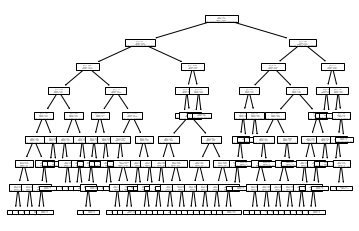

In [ ]:
#visualize the tree
tree.plot_tree(clf2)

In [ ]:
#//Predt Predt_cat Predt_subcat
#dfTEST['attack', 'category', 'subcategory']
a=dfTEST['attack']
b=dfTEST['category']
c=dfTEST['subcategory']
count=0
for i in range(0,len(dfTEST)):
  if(Predt[i]==a[i]) and (Predt_cat[i]==b[i]) and (Predt_subcat[i]==c[i]):
    count=count+1
count
count/len(dfTEST)*100

96.96581050967352